In [1]:
import pandas

pokemons = pandas.read_csv("../datasets/pokedex.csv")
pokemons.head()

,NUMERO,NOMBRE,TIPO_1,TIPO_2,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDARIO
0,1,Bulbizarre,Herbe,Poison,45,49,49,65,65,45,1,FAUX
1,2,Herbizarre,Herbe,Poison,60,62,63,80,80,60,1,FAUX
2,3,Florizarre,Herbe,Poison,80,82,83,100,100,80,1,FAUX
3,4,Mega Florizarre,Herbe,Poison,80,100,123,122,120,80,1,FAUX
4,5,Salamèche,Feu,NaN,39,52,43,60,50,65,1,FAUX


In [2]:
# Transformación de la columna legendario
pokemons['LEGENDARIO'] = (pokemons['LEGENDARIO'] == 'VRAI').astype(int)

pokemons['LEGENDARIO'].head()

0    0
1    0
2    0
3    0
4    0
Name: LEGENDARIO, dtype: int64

In [3]:
pokemons.shape

(800, 12)

In [4]:
pokemons.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   NUMERO                   800 non-null    int64 
 1   NOMBRE                   799 non-null    object
 2   TIPO_1                   800 non-null    object
 3   TIPO_2                   413 non-null    object
 4   POINTS_DE_VIE            800 non-null    int64 
 5   POINTS_ATTAQUE           800 non-null    int64 
 6   POINTS_DEFFENCE          800 non-null    int64 
 7   POINTS_ATTAQUE_SPECIALE  800 non-null    int64 
 8   POINT_DEFENSE_SPECIALE   800 non-null    int64 
 9   POINTS_VITESSE           800 non-null    int64 
 10  NOMBRE_GENERATIONS       800 non-null    int64 
 11  LEGENDARIO               800 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 75.1+ KB


In [5]:
# Pokemons sin nombre asignado
pokemons[pokemons['NOMBRE'].isnull()]

,NUMERO,NOMBRE,TIPO_1,TIPO_2,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDARIO
62,63,NaN,Combat,NaN,65,105,60,60,70,95,1,0


In [6]:
pokemons['NOMBRE'][62] = "Primeape"
pokemons['NOMBRE'][62]

/var/folders/s_/9gk511015_11fct2bcmymdhc0000gn/T/ipykernel_994/1063676417.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pokemons['NOMBRE'][62] = "Primeape"


'Primeape'

In [8]:
# Carga de los datos de los combates
combats = pandas.read_csv("../datasets/combates.csv")
combats.head()

,Primer_Pokemon,Segundo_Pokemon,Pokemon_Ganador
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151


In [9]:
combats.shape

(50000, 3)

In [10]:
# Ver la cantidad de veces que un pokemon ha combatido en primera posición
number_times_first_position = combats.groupby('Primer_Pokemon').count()
number_times_first_position.head()

,Segundo_Pokemon,Pokemon_Ganador
Primer_Pokemon,,
1,70,70
2,55,55
3,68,68
4,62,62
5,50,50


In [11]:
# Ver la cantidad de veces que cada pokemon ha combatido en segunda posición
number_times_second_position = combats.groupby('Segundo_Pokemon').count()
number_times_second_position

,Primer_Pokemon,Pokemon_Ganador
Segundo_Pokemon,,
1,63,63
2,66,66
3,64,64
4,63,63
5,62,62
...,...,...
796,56,56
797,67,67
798,59,59


In [12]:
# Cantidad total de combates
total_amount_of_combats = number_times_first_position + number_times_second_position
total_amount_of_combats.head()

,Pokemon_Ganador,Primer_Pokemon,Segundo_Pokemon
Primer_Pokemon,,,
1,133,NaN,NaN
2,121,NaN,NaN
3,132,NaN,NaN
4,125,NaN,NaN
5,112,NaN,NaN


In [13]:
# Cantidad total de combates ganados por cada pokemon
amount_victories = combats.groupby('Pokemon_Ganador').count()
amount_victories

,Primer_Pokemon,Segundo_Pokemon
Pokemon_Ganador,,
1,37,37
2,46,46
3,89,89
4,70,70
5,55,55
...,...,...
796,39,39
797,116,116
798,60,60


In [14]:
# Crear lista con pokedex y los datos de los combates realizados y ganados
list_to_add = combats.groupby('Pokemon_Ganador').count()
list_to_add.sort_index()

list_to_add['NUMERO_COMBATES'] = number_times_first_position['Pokemon_Ganador'] + number_times_second_position['Pokemon_Ganador']
    
list_to_add['NUMERO_VICTORIAS'] = amount_victories['Primer_Pokemon']
    
list_to_add['PORCENTAJE_VICTORIA'] = amount_victories.Primer_Pokemon/(number_times_first_position['Pokemon_Ganador'] + number_times_second_position['Pokemon_Ganador'])    

list_to_add

,Primer_Pokemon,Segundo_Pokemon,NUMERO_COMBATES,NUMERO_VICTORIAS,PORCENTAJE_VICTORIA
Pokemon_Ganador,,,,,
1,37,37,133,37,0.278195
2,46,46,121,46,0.380165
3,89,89,132,89,0.674242
4,70,70,125,70,0.560000
5,55,55,112,55,0.491071
...,...,...,...,...,...
796,39,39,105,39,0.371429
797,116,116,131,116,0.885496
798,60,60,119,60,0.504202


In [15]:
new_pokedex = pokemons.merge(list_to_add, left_on='NUMERO', right_index=True, how='left')
new_pokedex

,NUMERO,NOMBRE,TIPO_1,TIPO_2,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDARIO,Primer_Pokemon,Segundo_Pokemon,NUMERO_COMBATES,NUMERO_VICTORIAS,PORCENTAJE_VICTORIA
0,1,Bulbizarre,Herbe,Poison,45,49,49,65,65,45,1,0,37.0,37.0,133.0,37.0,0.278195
1,2,Herbizarre,Herbe,Poison,60,62,63,80,80,60,1,0,46.0,46.0,121.0,46.0,0.380165
2,3,Florizarre,Herbe,Poison,80,82,83,100,100,80,1,0,89.0,89.0,132.0,89.0,0.674242
3,4,Mega Florizarre,Herbe,Poison,80,100,123,122,120,80,1,0,70.0,70.0,125.0,70.0,0.560000
4,5,Salamèche,Feu,NaN,39,52,43,60,50,65,1,0,55.0,55.0,112.0,55.0,0.491071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,796,Diancie,Roche,Fée,50,100,150,100,150,50,6,1,39.0,39.0,105.0,39.0,0.371429
796,797,Mega Diancie,Roche,Fée,50,160,110,160,110,110,6,1,116.0,116.0,131.0,116.0,0.885496
797,798,Hoopa confiné,Psy,Spectre,80,110,60,150,130,70,6,1,60.0,60.0,119.0,60.0,0.504202
798,799,Hoopa non lié,Psy,Obscur,80,160,60,170,130,80,6,1,89.0,89.0,144.0,89.0,0.618056


In [16]:
new_pokedex.describe()

,NUMERO,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDARIO,Primer_Pokemon,Segundo_Pokemon,NUMERO_COMBATES,NUMERO_VICTORIAS,PORCENTAJE_VICTORIA
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800.00000,783.000000,783.000000,783.000000,783.000000,783.000000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,0.08125,63.856960,63.856960,127.541507,63.856960,0.501538
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,0.27339,32.925941,32.925941,11.397402,32.925941,0.254993
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,0.00000,3.000000,3.000000,92.000000,3.000000,0.021739
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,0.00000,36.000000,36.000000,120.000000,36.000000,0.284228
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,0.00000,62.000000,62.000000,128.000000,62.000000,0.491071
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,0.00000,91.000000,91.000000,135.000000,91.000000,0.717644
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000,1.00000,152.000000,152.000000,164.000000,152.000000,0.984496


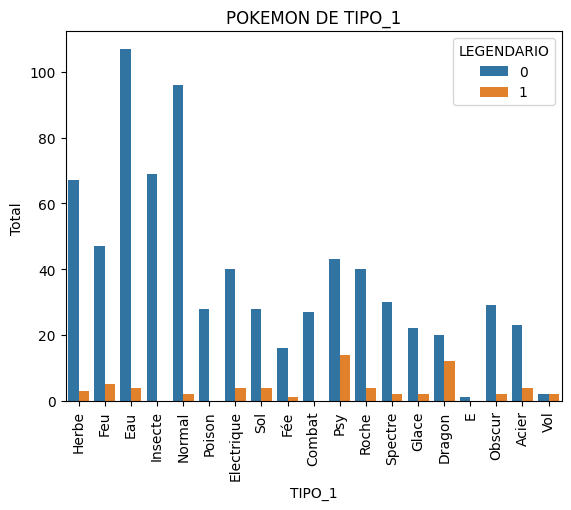

In [17]:
import matplotlib.pyplot as pyplot
import seaborn

axis_x = seaborn.countplot(x="TIPO_1", hue="LEGENDARIO", data=new_pokedex)
pyplot.xticks(rotation=90)
pyplot.xlabel('TIPO_1')
pyplot.ylabel('Total ')
pyplot.title("POKEMON DE TIPO_1")
pyplot.show()

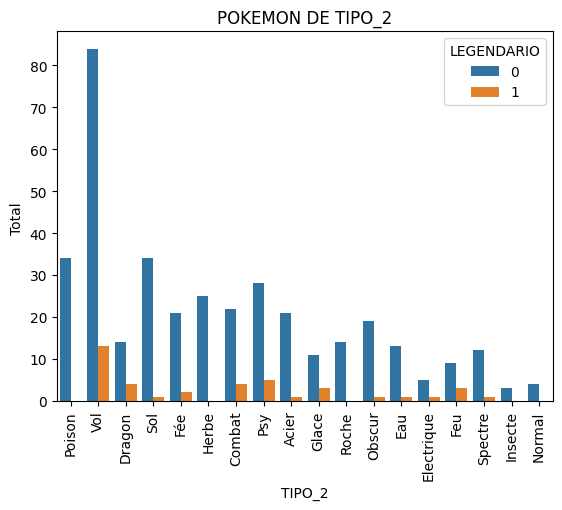

In [18]:
axis_x = seaborn.countplot(x="TIPO_2", hue="LEGENDARIO", data=new_pokedex)
pyplot.xticks(rotation=90)
pyplot.xlabel('TIPO_2')
pyplot.ylabel('Total ')
pyplot.title("POKEMON DE TIPO_2")
pyplot.show()

In [19]:
# Ordenar de menor a mayor la media calculada de los porcentajes de victorias de cada pokemon
new_pokedex.groupby('TIPO_1').agg({'PORCENTAJE_VICTORIA': 'mean'}).sort_values(by="PORCENTAJE_VICTORIA")

# Puede comprobar que los pokemons ganadores son te tipo Siniestro, Eléctrico, Dragón y Volador

,PORCENTAJE_VICTORIA
TIPO_1,
Fée,0.329300
E,0.343750
Roche,0.404852
Acier,0.424529
Poison,0.433262
Insecte,0.439006
Glace,0.439604
Herbe,0.440364
Eau,0.470520


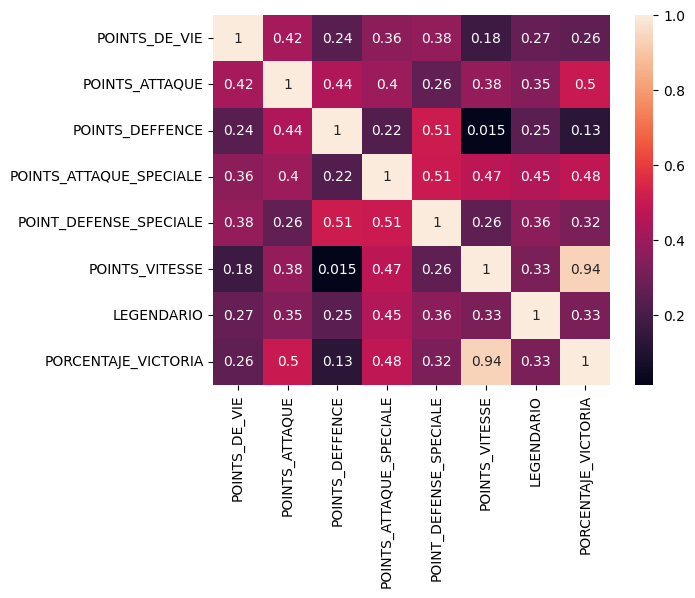

In [19]:
correlation = new_pokedex.loc[:, ['TIPO_1', 'POINTS_DE_VIE', 'POINTS_ATTAQUE', 'POINTS_DEFFENCE', 'POINTS_ATTAQUE_SPECIALE', 'POINT_DEFENSE_SPECIALE', 'POINTS_VITESSE', 'LEGENDARIO', 'PORCENTAJE_VICTORIA']].corr()
seaborn.heatmap(correlation, xticklabels=correlation.columns, yticklabels=correlation.columns, annot=True)
pyplot.show()
# La cifra que se encuentra entre las dos características corresponde al porcentaje relación, 
# cuanto más se acerca al 1, más fuerte es la relación

In [23]:
dataset = new_pokedex
dataset.to_csv("../datasets/dataset.csv", sep="\t")

In [32]:
dataset = pandas.read_csv("../datasets/dataset.csv", delimiter="\t")

dataset

,Unnamed: 0,NUMERO,NOMBRE,TIPO_1,TIPO_2,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDARIO,Primer_Pokemon,Segundo_Pokemon,NUMERO_COMBATES,NUMERO_VICTORIAS,PORCENTAJE_VICTORIA
0,0,1,Bulbizarre,Herbe,Poison,45,49,49,65,65,45,1,0,37.0,37.0,133.0,37.0,0.278195
1,1,2,Herbizarre,Herbe,Poison,60,62,63,80,80,60,1,0,46.0,46.0,121.0,46.0,0.380165
2,2,3,Florizarre,Herbe,Poison,80,82,83,100,100,80,1,0,89.0,89.0,132.0,89.0,0.674242
3,3,4,Mega Florizarre,Herbe,Poison,80,100,123,122,120,80,1,0,70.0,70.0,125.0,70.0,0.560000
4,4,5,Salamèche,Feu,NaN,39,52,43,60,50,65,1,0,55.0,55.0,112.0,55.0,0.491071
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,795,796,Diancie,Roche,Fée,50,100,150,100,150,50,6,1,39.0,39.0,105.0,39.0,0.371429
796,796,797,Mega Diancie,Roche,Fée,50,160,110,160,110,110,6,1,116.0,116.0,131.0,116.0,0.885496
797,797,798,Hoopa confiné,Psy,Spectre,80,110,60,150,130,70,6,1,60.0,60.0,119.0,60.0,0.504202
798,798,799,Hoopa non lié,Psy,Obscur,80,160,60,170,130,80,6,1,89.0,89.0,144.0,89.0,0.618056


In [33]:
# Eliminar las filas donde falta valores
dataset  = dataset.dropna(axis=0, how='any')
dataset

,Unnamed: 0,NUMERO,NOMBRE,TIPO_1,TIPO_2,POINTS_DE_VIE,POINTS_ATTAQUE,POINTS_DEFFENCE,POINTS_ATTAQUE_SPECIALE,POINT_DEFENSE_SPECIALE,POINTS_VITESSE,NOMBRE_GENERATIONS,LEGENDARIO,Primer_Pokemon,Segundo_Pokemon,NUMERO_COMBATES,NUMERO_VICTORIAS,PORCENTAJE_VICTORIA
0,0,1,Bulbizarre,Herbe,Poison,45,49,49,65,65,45,1,0,37.0,37.0,133.0,37.0,0.278195
1,1,2,Herbizarre,Herbe,Poison,60,62,63,80,80,60,1,0,46.0,46.0,121.0,46.0,0.380165
2,2,3,Florizarre,Herbe,Poison,80,82,83,100,100,80,1,0,89.0,89.0,132.0,89.0,0.674242
3,3,4,Mega Florizarre,Herbe,Poison,80,100,123,122,120,80,1,0,70.0,70.0,125.0,70.0,0.560000
6,6,7,Dracaufeu,Feu,Vol,78,84,78,109,85,100,1,0,115.0,115.0,133.0,115.0,0.864662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,795,796,Diancie,Roche,Fée,50,100,150,100,150,50,6,1,39.0,39.0,105.0,39.0,0.371429
796,796,797,Mega Diancie,Roche,Fée,50,160,110,160,110,110,6,1,116.0,116.0,131.0,116.0,0.885496
797,797,798,Hoopa confiné,Psy,Spectre,80,110,60,150,130,70,6,1,60.0,60.0,119.0,60.0,0.504202
798,798,799,Hoopa non lié,Psy,Obscur,80,160,60,170,130,80,6,1,89.0,89.0,144.0,89.0,0.618056


In [34]:
# Extraer las caracteristicas que seran fuente de apredizaje
# PUNTOS DE ATAQUE
# PUNTOS DE DEFENSA
# PUNTOS DE ATAQUE ESPECIAL
# PUNTOS DE DEFENSA ESPECIAL
# PUTOS DE VELOCIDAD
# CANTIDAD DE GENERACIOENS

# Se toman todos los datos, pero solo las caracteristicas de 5 a 12
x = dataset.iloc[:, 5:12].values
# Solo se toma la caracteristica porcentaje de victoria
y = dataset.iloc[:, 17].values
x

array([[ 45,  49,  49, ...,  65,  45,   1],
       [ 60,  62,  63, ...,  80,  60,   1],
       [ 80,  82,  83, ..., 100,  80,   1],
       ...,
       [ 80, 110,  60, ..., 130,  70,   6],
       [ 80, 160,  60, ..., 130,  80,   6],
       [ 80, 110, 120, ...,  90,  70,   6]])

In [35]:
# Predecir un porcentaje de victoria de un pokemon en función de sus puntos de 
# ataque, de su velocidad, de sus puntos de vida, de su cantidad de generaciones, 
# y de sus puntos de defensa

from sklearn.model_selection import train_test_split

# Construcción del conjunto de entrenamiento y el conjunto de pruebas
X_LEARN, X_VALIDATION, Y_LEARN, Y_VALIDATION = train_test_split(x, y, test_size=0.2, random_state=0)

In [36]:
# Algoritmo de regresión lineal
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

algorithm = LinearRegression()
algorithm.fit(X_LEARN, Y_LEARN)

predictions = algorithm.predict(X_VALIDATION)
predictions

array([0.93274122, 0.29039066, 0.84957571, 1.08120693, 0.59565727,
       0.74155522, 0.89728486, 0.2869941 , 0.72479294, 0.2769065 ,
       0.78658176, 0.37758448, 0.85162923, 0.46145503, 0.34759796,
       0.46414128, 0.38101508, 0.6331694 , 0.45546854, 0.29973464,
       0.64196771, 0.60210823, 0.59369114, 0.61352751, 0.36634774,
       0.45241034, 0.37245142, 0.44468543, 0.90141746, 0.43269244,
       0.42279561, 0.81158627, 0.97470757, 1.08035093, 0.35837542,
       0.48206271, 0.4513419 , 0.46333592, 0.77055948, 0.16268825,
       0.34119024, 0.66710198, 0.72624278, 0.14625575, 0.76199419,
       0.40487818, 0.36529418, 0.55657202, 0.66033008, 0.24908088,
       0.57202349, 0.82879949, 0.36241052, 0.61718675, 0.2172004 ,
       0.62501115, 0.17834362, 0.58304052, 0.36561286, 0.23270023,
       0.54018207, 0.13477037, 0.49722612, 0.57668822, 0.38783283,
       0.74082446, 0.7904909 , 0.48985839, 0.37710771, 0.84016034,
       0.79108077, 0.45508097, 0.21972872, 0.795014  , 0.46408

In [37]:
# (score)
accuracy = r2_score(Y_VALIDATION, predictions)
accuracy

0.9043488485570964

In [38]:
# Utilizar el árbol de decisiones

from sklearn.tree import DecisionTreeRegressor

algorithm = DecisionTreeRegressor()
algorithm.fit(X_LEARN, Y_LEARN)

predictions = algorithm.predict(X_VALIDATION)
accuracy = r2_score(Y_VALIDATION, predictions)

accuracy

0.8788777330809898

In [39]:
# Random forest
from sklearn.ensemble import RandomForestRegressor

algorithm = RandomForestRegressor()
algorithm.fit(X_LEARN, Y_LEARN)

predictions = algorithm.predict(X_VALIDATION)
accuracy = r2_score(Y_VALIDATION, predictions)

accuracy

0.9374782382279351

In [40]:
# Guardar modelo
import joblib

file = '../models/model_pokemon.mod'
joblib.dump(algorithm, file)


['../models/model_pokemon.mod']